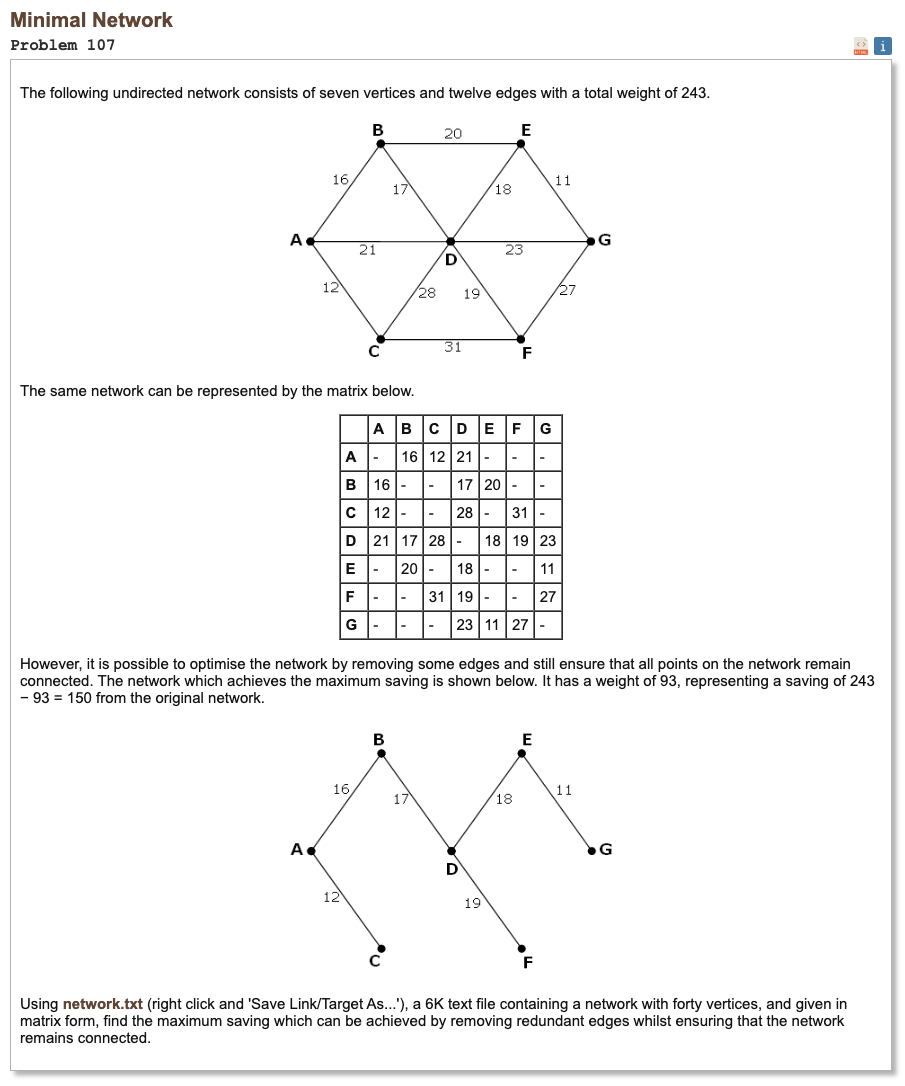

## Initial approach

* to solve this problem, we need to first understand kruskal algorithm

### Kruskal Algorithm

* sort all edges from small to big
* add smallest edge if it doesn't make a cycle
* a cycle means a round path, so if it doesn't create a cycle, keep the edge
* repeat until all nodes are connected

* define a function for kruskal algorithm

In [1]:
def find(parent, x):
    while parent[x] != x:
        x = parent[x]
    return x

def union(parent, x, y):
    rx = find(parent, x)
    ry = find(parent, y)
    if rx != ry:
        parent[ry] = rx
        return True
    return False

def kruskal(n, edges):
    parent = list(range(n))
    edges.sort(key=lambda x: x[2])
    mst_cost = 0
    for u, v, w in edges:
        if union(parent, u, v):
            mst_cost += w
    return mst_cost

## Approach:

* read the matrix as a weighted undirected graph
* calculate the total cost of all edges
* build a minimum spanning tree using kruskal algorithm
* calculate the cost of mst
* calculate maximum saving = total cost - mst cost

In [2]:
%%time

path = "0107_network.txt"
matrix = []
with open(path) as f:
    for line in f:
        parts = line.strip().split(",")
        row = [None if (p == "-" or p == "") else int(p) for p in parts]
        if row:
            matrix.append(row)

n = len(matrix)
edges = []
total_cost = 0
for i in range(n):
    for j in range(i + 1, n):
        if matrix[i][j] is not None:
            w = matrix[i][j]
            edges.append((i, j, w))
            total_cost += w

mst_cost = kruskal(n, edges)
saving = total_cost - mst_cost
print("Result:", saving)

Result: 259679
CPU times: user 2.48 ms, sys: 1.12 ms, total: 3.6 ms
Wall time: 2.89 ms
